# Assignment 2: ML Engineering 2

In [2]:
# enter your name and UFL email address
name = 'Kamal Sai Raj Kuncha'
email = 'k.kuncha@ufl.edu'

In [3]:
if name == 'enter your name' or email == 'enter your email':
    assert False, 'Enter your name & email first!'
else:
    print('Assignment 2 -- name: {}, email: {}\n'.format(name, email))
    
    # Load packages we need
    import sys
    import os
    import time

    import numpy as np
    import pandas as pd
    import sklearn

    from matplotlib import pyplot as plt
    plt.rcParams.update({'font.size': 16})

    # Let's check our software versions
    print('### Python version: ' + __import__('sys').version)
    print('### NumPy version: ' + np.__version__)
    print('### Scikit-learn version: ' + sklearn.__version__)
    print('------------')


    # load our packages / code
    sys.path.insert(1, '../common/')
    import utils
    import plots

Assignment 2 -- name: Kamal Sai Raj Kuncha, email: k.kuncha@ufl.edu

### Python version: 3.6.5 (v3.6.5:f59c0932b4, Mar 28 2018, 17:00:18) [MSC v.1900 64 bit (AMD64)]
### NumPy version: 1.19.5
### Scikit-learn version: 0.24.0
------------


In [4]:
# global parameters to control behavior of the pre-processing, ML, analysis, etc.
seed = 42

# deterministic seed for reproducibility
##rng = np.random.default_rng(seed)  # best practice but not fully implemented in scikit-learn
np.random.seed(seed)

prop_vec = [16, 2, 2]

## Part 1: Loading and Pre-processing Data

### Loading data

In [5]:
### In this case, we'll directly load the Adult dataset pre-processed in a similar way as for assignment 1
### and we'll immediately split it into train, test, validation.

train_x, train_y, test_x, test_y, val_x, val_y, features, labels = utils.load_preproc_adult(prop_vec=prop_vec, seed=seed)

In [6]:
# check that we have what we expect
print('Training: {}, {}'.format(train_x.shape, train_y.shape))
print('Test: {}, {}'.format(test_x.shape, test_y.shape))
print('Validation: {}, {}'.format(val_x.shape, val_y.shape))

Training: (36178, 88), (36178,)
Test: (4523, 88), (4523,)
Validation: (4521, 88), (4521,)


In [7]:
# print features and labels
print('Features: {}'.format(features))
print('Labels: {}'.format(labels))

# as you can see this the one-hot encoded version of the data with proper names for the columns/features.

Features: ['age', 'workclass_0', 'workclass_1', 'workclass_2', 'workclass_3', 'workclass_4', 'workclass_5', 'workclass_6', 'workclass_7', 'education-num', 'marital-status_0', 'marital-status_1', 'marital-status_2', 'marital-status_3', 'marital-status_4', 'marital-status_5', 'marital-status_6', 'occupation_0', 'occupation_1', 'occupation_2', 'occupation_3', 'occupation_4', 'occupation_5', 'occupation_6', 'occupation_7', 'occupation_8', 'occupation_9', 'occupation_10', 'occupation_11', 'occupation_12', 'occupation_13', 'relationship_0', 'relationship_1', 'relationship_2', 'relationship_3', 'relationship_4', 'relationship_5', 'race_0', 'race_1', 'race_2', 'race_3', 'race_4', 'sex_0', 'sex_1', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country_0', 'native-country_1', 'native-country_2', 'native-country_3', 'native-country_4', 'native-country_5', 'native-country_6', 'native-country_7', 'native-country_8', 'native-country_9', 'native-country_10', 'native-country_11', 'native-c

In [8]:
# Let's take a look at some rows of our training data just so we know what it looks like
print(train_x[2,:])
print(train_y[0:20])

[ 0.94207283  1.          0.          0.          0.          0.
  0.          0.          0.          1.12875281  0.          0.
  1.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          1.          0.          0.          0.
  0.          1.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          1.
  1.          0.         -0.1467332  -0.21878026  0.7547014   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          1.          0.          0.        ]
[1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 

## [Task 1] (30 points) Let's tune hyperparameters! We will use scikit-learn in two ways to optimize hyperparameters of SVM: (1) grid search, (2) randomized search.

### [Task 1a] (10 points) Use GridSearchCV from scikit-learn to do a grid search for SVM hyperparameters. Note that this way will use cross-validation to find the best hyperparameters values and that we purposefully disable some warnings to avoid verbose output.

In [9]:
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1, 1, 5], 'penalty': ['l1', 'l2']}
model = LinearSVC(max_iter=1000, dual=False)

# We'll use this to avoid some annoying convergence warnings 
# Note: don't just do that without thinking in your own projects, warnings are there for a reason folks!
## (In this case, it's okay because it's for illustration, but obviously if the model doesn't converge in 
## some cases we may not find the true best hyperparams)
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)
def do_grid_search(model, param_grid):
    
    # use the GridSearchCV class of scikit-learn to do a grid search on the provided grid (use 'model')
    # set accuracy as scoring function and return the output of fit() on the training data
    
    ###* put your code here (~2 lines) *###
    dgs=GridSearchCV(model,param_grid,scoring='accuracy')
    return dgs.fit(train_x,train_y)
    

gs_res = do_grid_search(model, param_grid)

### [Task 1b] (3 points) How many combination of hyperparameters were tested?

In [10]:
###* put your answer as comment here *###
# The number of hyperparameters that were tested were 6 in total as 3 for 'C' multiplied by 2 for 'penalty'.
#
# 

### [Task 1c] (2 points) What is the best combination of hyperparameters?

In [11]:
# Show the best combination of parameters found through the search 
# Hint: look at the documentation of GridSearchCV
###* put your code here (~2 lines) *###
# store this combination in 'gs_best_hyperparams' and print it
gs_best_hyperparams=gs_res.best_params_
print(gs_best_hyperparams)

{'C': 0.1, 'penalty': 'l1'}


### [Task 1d] (10 points) Use RandomizedSearchCV to do a search! We'll use a halfnormal distribution from Scipy to find values for C.

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import halfnorm

param_dist = dict(C=halfnorm(loc=0, scale=4.0), penalty=['l1', 'l2'])
model = LinearSVC(max_iter=1000, dual=False)

# We'll use this to avoid some annoying convergence warnings 
# Note: don't just do that in your own projects, warnings are there for a reason!
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)
def do_randomized_search(model, param_dist):
    # use the RandomizedSearchCV class of scikit-learn to do a randomized search (use 'model')
    # use accuracy as scoring function and return the result of fit() on the training data 
    # Also for reproducibility: set the random_state
    
    ###* put your code here (~2 lines) *###
    drs=RandomizedSearchCV(model,param_dist,scoring='accuracy',random_state=seed)
    return drs.fit(train_x,train_y)
    
    

rs_res = do_randomized_search(model, param_dist)

In [14]:
re_res.get_params(deep=True)

NameError: name 're_res' is not defined

### [Task 1e] (1 points) What is the best combination of hyperparameters?

In [12]:
# Show the best combination of parameters found through the randomized search 
###* put your code here (~1 line) *###
rs_res.best_params_

{'C': 1.2756087387575334, 'penalty': 'l1'}

### [Task 1f] (4 points) What are the pros and cons of a randomized search? Explain your answer. (A few sentences is okay.)

In [13]:
# what do you think are the pros and cons of a randomized search?
###* put your answer as comment here *###
# The pros of randomized search are:
# It is less time consuming as it only runs on a select randomized sample rather than doing a exhaustive search over the
# entire dataset. Generally, in the long run it tends to generate the best results and that too in lesser time.
# The cons of randomized search are:
# There is a risk of high variance as the selection is totally random and may not cover all possible combinations.

## [Task 2] (10 points) Let's train the model and evaluate it!

In [15]:
# complete the function to calculate accuracy (value in [0,1] range)
def model_accuracy(model, x, true_y):
    ###* put your code here (~2 lines) *###
    pred = model.predict(x)
    return np.sum(pred == true_y) / true_y.shape[0]

def evaluate_model(name, model, train_x, train_y, val_x, val_y):
    train_acc = model_accuracy(model, train_x, train_y)
    val_acc = model_accuracy(model, val_x, val_y)
    print('{}: \n\t--- Training accuracy: {:.2f}%, Validation accuracy: {:.2f}%'.format(name, train_acc*100, val_acc*100))
    return
    #return train_acc,val_acc

###* put your code here (~1 line) *### 
### Train a LinearSVC using the best hyperparameters found during the grid search in Task 1
### In addition you should also use: max_iter=10000, dual=False
### Use the training data (train_x, train_y)
### Hint: there is a way to pass the best hyperparameters object from Task 1b directly to the model object (i.e., without passing it one hyperparameter at a time)

svm=LinearSVC(max_iter=10000,dual=False,random_state=seed,**gs_best_hyperparams)
svm.fit(train_x,train_y)
evaluate_model('LinearSVC(w/ best grid search hyperparams {})'.format(gs_best_hyperparams), 
               svm, train_x, train_y, val_x, val_y)

LinearSVC(w/ best grid search hyperparams {'C': 0.1, 'penalty': 'l1'}): 
	--- Training accuracy: 84.99%, Validation accuracy: 84.67%


## [Task 3] (30 points) Manual Hyperparameter Optimization (i.e., without using scikit-learn's to do the search for us)!

### [Task 3a] (10 points) Complete the code below to do a grid search manually. In this case you cannot use GridSearchCV, you must train and evaluate the model on each combination of hyperparameter values.

In [16]:
## we are allowed to use the following from scikit-learn
from sklearn.model_selection import ParameterGrid 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

hyperparams_vals = {'weights': ['uniform', 'distance'],
                    'metric': ['euclidean', 'chebyshev'],
                    'n_neighbors': [1, 3, 5, 7, 11, 51]}

grid = ParameterGrid(hyperparams_vals)

trsub_size = 5000
trsub_x = train_x[:trsub_size,:]
trsub_y = train_y[:trsub_size]

## iterate over the entire grid. In each case, train a KNN classifier with the given hyperparameters (on the training subset 'trsub')
# and measure accuracy on both the training subset data and the validation data!
# note: we use a subset of the training data to speed up the process a bit
for i, hyperparams in enumerate(list(grid)):
    
    ###* put your code here  (~ 5 lines) *###
    ### In each iteration of the loop you should train a KNeighborsClassifier using 'hyperparams' as hyperparameters
    ### You should train the model on 'trsub_x' and 'trsub_y'!
    ### Once your model is trained, compute the accuracy on trsub (training accuracy) and on val (validation accuracy) 
    ### store the results in 'train_acc' and 'val_acc' respectively
    knn=KNeighborsClassifier(**hyperparams)
    knn.fit(trsub_x,trsub_y)
    train_acc = model_accuracy(knn, trsub_x, trsub_y)
    val_acc = model_accuracy(knn, val_x, val_y)
    ## This will print information about the grid search as it progresses
    print('Iter {}, hyperparams: {}\n \t-> train accuracy: {:.2f}%, val accuracy: {:.2f}%'.
              format(i, hyperparams, 100*train_acc, 100*val_acc))

Iter 0, hyperparams: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
 	-> train accuracy: 99.50%, val accuracy: 79.25%
Iter 1, hyperparams: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
 	-> train accuracy: 99.50%, val accuracy: 79.25%
Iter 2, hyperparams: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
 	-> train accuracy: 89.68%, val accuracy: 81.55%
Iter 3, hyperparams: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
 	-> train accuracy: 99.52%, val accuracy: 80.80%
Iter 4, hyperparams: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
 	-> train accuracy: 87.40%, val accuracy: 81.84%
Iter 5, hyperparams: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
 	-> train accuracy: 99.52%, val accuracy: 81.13%
Iter 6, hyperparams: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
 	-> train accuracy: 87.00%, val accuracy: 82.11%
Iter 7, hyperparams: {'metric': 'euclidean', 'n_neig

### [Task 3b] (5 points) Answer the following questions. (A few sentences is fine.)
### What combination of hyperparameters would you use and why? Is the training accuracy useful when doing hyperparameter tuning? Why or why not?

In [17]:
# What combination of hyperparameters would you use and why?
###* put your answer as comment here *###
# The combination which has metric 'euclidean', n_neighbors 11 and weights 'uniform'. This is because it has a high validation
# accuracy and relatively similar training accuracy to validation. The model generalises well and fits well onto the data. 
# Since we have used part of the training data for training, if we use the entire training set this might yield better results.


In [18]:
# Is the training accuracy useful when doing hyperparameter tuning? Why or why not?
###* put your answer as comment here *###
# Yes, it is useful in checking training accuracy when doing hyperparameter tuning. This is because it is helpful in comparing
# the hyperparameter combinations, that is checking for each model that is generated from a hyperparameter combination whether the
# model is overfitting or underfitting.

### [Task 3d] (10 points) Answer the following questions. (A few sentences is fine.)
### Observe what happens when weights changes from 'uniform' to 'distance'? Provide a plausible explanation for this.

In [19]:
# What do you observe in terms of the training and validation accuracies when the weights change from 'uniform' to 
# 'distance'?
###* put your answer as comment here *###
# Whenever there is a change from uniform to distance, all other hyperparameters remain same, there is an increase in training
# accuracy and decrease in validation accuracy.For the case in which the n_neighbours is 1 both the models are overfitting 
# regardless of other hyperparameters.


## provide a plausible explanation for this phenomenon.
###* put your answer as comment here *###
#  This shows that whenever there is a change of weights from uniform to distance the model is overfitting with high training
# accuracy and relatively low validation accuracy. This is because in distance weighing scheme the weights are assigned  
# according to distance and this can lead to a possible exclusion of features in instances which are farther from that may 
# be important.  

## If you were to train a KNN model would you set weights to 'uniform' or 'distance'? Why?
###* put your answer as comment here *###
# As shown by the accuracies in various hyperparameter combinations that using distance as weight metric has brought the model
# to be overfitted when compared to uniform, generally I would be choosing uniform for a better model. But this may also depend on the 
# data as well.

### [Task 3e] (5 points) Which hyperparameters (if any) have a significant impact on overfitting and why?

In [20]:
### According to the grid search you just performed, which hyperparameters seem to have significant impact on overfitting and why?
## Explain your reasoning and justify your answer!
###* put your answer as comment here *###
# The hyperparameters weights and n_neighbours have significant impact on overfitting. This is because whenever there is a change
# of weight from uniform to distance the model overfits. This is due to possible feature exclusion. Also, if the number of 
# neighbours is low for instance 1, the model overfits irrespective of other hyperparamters. This is due to the fact that since
# each instance is a neighbour, the model tries to remember every neighbour for each instance.

## [Task 4] (30 points) Exploring Bias & Variance, Underfitting & Overfitting

### For this task, you *must* only use models (kNN or SVM) and hyperparameters that we have seen/used somewhere in this assignment!

### [Task 4a] (5 points) What is the irreducible error for this prediction task (income >=50k or <50k on Adult data)? Explain your reasoning.

In [21]:
###* put your answer as comment here *###
# The irreducible error for this prediction task might be in the range say 10-15%. This is due to the fact that after training
# many models with different combinations of hyperparameters and data sizes, the validation accuracy appears to be less than
# 90% which implies that the irreducible error to be more than 10%. This might due to the fact that some inherent noise in
# the data that cannot be removed.

### For the rest of Task 4, we will assume that irreducible error (in the scale 1 - accuracy) is about 15%

### [Task 4b] (5 points) Train a high bias, low variance model. Show *and* explain why the model has high bias and low variance! (Use evaluate_model() to calculate and display training accuracy and validation accuracy.)

In [148]:
###* Put your code here (~2 lines) *###
knn=KNeighborsClassifier(metric= 'chebyshev', n_neighbors= 51, weights='uniform')
knn.fit(trsub_x,trsub_y)
evaluate_model('knn_hb_lw', knn, trsub_x, trsub_y, val_x, val_y)


###* put your answer as comment here *###
# This model has high bias and low variance, as the training accuracy and the validation accuracy are similar. This shows that
# the model is underfitted so the high bias, this is due to the fact that it is trained with less data. But it generalises 
# well to the data, so the low variance.
# 
#

knn_hb_lw: 
	--- Training accuracy: 82.58%, Validation accuracy: 81.55%


### [Task 4c] (5 points) Train a low bias, high variance model. Show *and* explain why the model has low bias and high variance! (Use evaluate_model() to calculate and display training accuracy and validation accuracy.)

In [142]:
###* Put your code here (~2 lines) *###
knn=KNeighborsClassifier(metric= 'chebyshev', n_neighbors= 1, weights='distance')
knn.fit(trsub_x,trsub_y)
evaluate_model('knn_lb_hw', knn, trsub_x, trsub_y, val_x, val_y)

###* put your answer as comment here *###
# This model has low bias and high variance, as the training accuracy is high and validation accuracy is low. This shows that 
# the model is overfitted so the low bias but the high variance. The model memorises data well but is not good on the data which
# it has not seen.

knn_lb_hw: 
	--- Training accuracy: 99.14%, Validation accuracy: 71.13%


### [Task 4d] (5 points) Train a low bias, low variance model. Show *and* explain why the model has low bias and low variance! (Use evaluate_model() to calculate and display training accuracy and validation accuracy.)

In [149]:
###* Put your code here (~2 lines) *###
knn1=KNeighborsClassifier(metric= 'euclidean', n_neighbors= 51, weights='distance')
knn1.fit(train_x,train_y)
evaluate_model('knn_lb_lv',svm1, train_x, train_y, val_x, val_y)
###* put your answer as comment here *###
# This model has low bias and low variance. This is because, since the irreducible error is assumed to be 15%, 
# the validation accuracy is as close to the accuracy it can be, so the low variance. The training accuracy is high, 
# so the low bias.
#

knn_lb_lv: 
	--- Training accuracy: 98.50%, Validation accuracy: 83.19%


### [Task 4e] (5 points) Can you train a high bias, high variance model. If so how? If not why not?

In [157]:
###* Put your code here (if applicable) *###
#knn1=KNeighborsClassifier(n_neighbors= 1,metric='chebyshev')
# knn1.fit(train_x[:10,:],train_y[:10])
svm=LinearSVC(max_iter=100,dual=False,C=5,penalty='l2')
svm.fit(trsub_x,trsub_y)
evaluate_model('knn_hb_hv', knn1, train_x[5000:,:], train_y[5000:], val_x, val_y)


###* put your answer as comment here *###
# No, I cannot train a high bias, high variance model. After trying a bunch of combinations of models, hyperparameters, and
# dataset sizes.I came to this conclusion. This may be due to the fact the inherently when these models try to solve the optimization 
# problem, there is trade off between the bias and variance everytime even on a case where the dataset is trained on part of 
# this dataset and tested for training accuracy and validation accuracy on another part of the same.
 

knn_hb_hv: 
	--- Training accuracy: 97.33%, Validation accuracy: 83.19%


### [Task 4f] (5 points) Train a badly *underfitted* model. The accuracy should be below 55%! (Use evaluate_model() to calculate and display training accuracy and validation accuracy.)

In [75]:
###* Put your code here (~2 lines) *###
knn1=KNeighborsClassifier(n_neighbors= 1,metric='chebyshev')
knn1.fit(train_x[:10,:],train_y[:10])
evaluate_model('knn_uf', knn1, train_x, train_y, val_x, val_y)



knn_uf: 
	--- Training accuracy: 53.66%, Validation accuracy: 54.06%


## [CIS6930 Additional Task -- Task 5] (25 points): Variance, Overfitting, Agreement Rate

### Suppose we have two models and want to compare them and instead of comparing them in terms of how good the models are, we care about whether the models have learned a similar relationship between features and label? One way we can measure this is using agreement rate: we use both models to make predictions on a separate dataset and then measure what proportion of those predictions are identical.

### Variance is the tendency to learn non-existing/wrong relationships between features and labels based on the idiosyncracies of the training data. So intuitively, if two models are trained on disjoint but randomly selected subsets of the training data, then if the variance is high the agreement rate between the two models should be low. So, we can try to measure variance by measuring agreement rate. But does this work? This is what you will explore experimentally in this task. (Note that overfitting and variance are related but are not the same thing.)

### [Task 5a] (5 points) Implement an overfitting measure and the agreement rate metric.

In [81]:
### We'll define two metrics, one for overfitting and the other for agreement rate

## for this assignment we define overfitting measure as the max between 0 and 
## the difference between training accuracy and validation accuracy
def overfitting_measure(train_acc, val_acc):
    ###* put your code here (~1 line) *###
    ### your code should return the maxmimum between: 0 and training accuracy - validation accuracy
    return max(0,train_acc-val_acc)


## the agreement rate is the proportion of identical prediction of both models on a separate dataset
## note: we don't care if the predictions are correct, we only care how often they are the same!
def agreement_rate(m1_preds, m2_preds):
    assert m1_preds.shape == m2_preds.shape
    
    ###* put your code here (~1 line) *###
    ### your code should return the proportion of identical predictions in m1_preds and m2_preds
    ### note: the agreement rate is a value in [0, 1] so make sure your code returns values in the same range!
    return np.sum(m1_preds == m2_preds) / m2_preds.shape[0]

In [82]:
from sklearn.base import clone

def eval_accuracy(model, train_x, train_y, val_x, val_y):
    train_acc = model_accuracy(model, train_x, train_y)
    val_acc = model_accuracy(model, val_x, val_y)
    
    return train_acc, val_acc

def measure_overfitting_agreement(model, train_x, train_y, trsz, val_x, val_y):
    m1 = clone(model)
    m2 = clone(model)
    
    n = train_x.shape[0]
    assert n/2 >= trsz and trsz > 0
    
    rng = np.random.default_rng()
    pi = rng.permutation(n)
    pi1 = pi[0:trsz]
    pi2 = pi[trsz:2*trsz]
    
    m1.fit(train_x[pi1], train_y[pi1])
    m2.fit(train_x[pi2], train_y[pi2])
    
    train_acc, val_acc = eval_accuracy(m1, train_x[pi1], train_y[pi1], val_x, val_y)
    m1_overfit =  np.maximum(0, train_acc - val_acc)
    
    train_acc, val_acc = eval_accuracy(m2, train_x[pi2], train_y[pi2], val_x, val_y)
    m2_overfit =  np.maximum(0, train_acc - val_acc)
    
    m1_val_pred = m1.predict(val_x)
    m2_val_pred = m2.predict(val_x)
    
    agr = agreement_rate(m1_val_pred, m2_val_pred)
    
    # for this task, we'll define our our overfitting measure as 
    # the average of the overfitting measure of the two models
    overfit = (m1_overfit + m2_overfit)/2.0 
    
    return overfit, agr

### [Task 5b] (10 points) Train SVM models on random subsets of the data with different C (regularization constant) and two different size for the training data. In each case, use measure_overfitting_agreement() defined above to train the models and compute overfitting and agreement.

In [118]:
Cs = np.logspace(-2,3,200)
training_sizes = [100, 200]

###* put your code here *###
### your code should use 'SVC(C=<value from Cs>, kernel='linear')' as model instances
### You should invoke measure_overfitting_agreement() to get the agreement rate and overfitting measure 
### (do this for all values in 'Cs' and both training sizes)
### and store the results in some array(s) of your choice so that you can plot this for Task 5c
output=[]
for i in range(0,len(training_sizes)):
    l=[]
    r=[]
    for c in Cs:
        svm=SVC(C=c,kernel='linear')
        l.append(measure_overfitting_agreement(svm, train_x, train_y, trsz, val_x, val_y)[0])
        r.append(measure_overfitting_agreement(svm, train_x, train_y, trsz, val_x, val_y)[1])
    output.append(l)
    output.append(r)



In [121]:
## for disagreement rate of 100 training size 
for i in range(0,len(output[1])):
    output[1][i]=1-output[1][i]


### [Task 5c] (5 points) Plot overfitting vs disagreement rate as a scatter plot for both training sizes

In [122]:
## for disagreement rate of 200 training size 
for i in range(0,len(output[3])):
    output[3][i]=1-output[3][i]


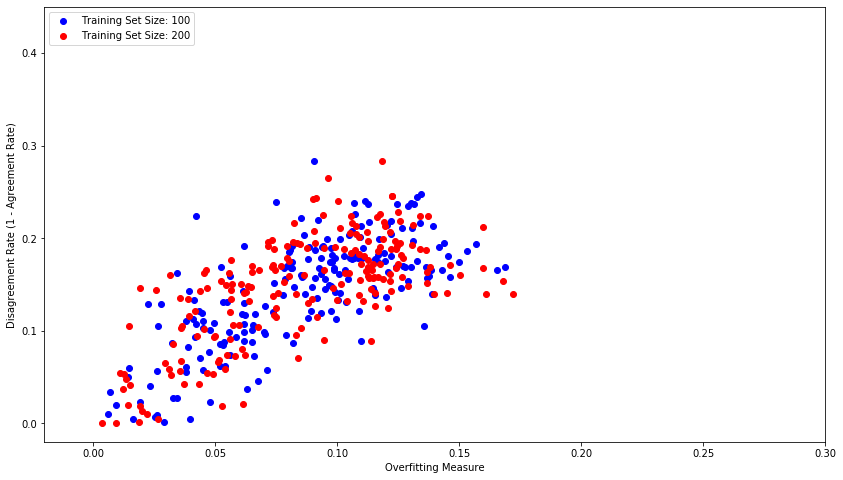

In [123]:
### Use matplotlib and supplement the provided code so it produces a single scatter plot of the two training set sizes
### with overfitting on the x-axis and *disagreement* (i.e., 1 - agreement rate) on the y-axis.
fig, ax = plt.subplots(figsize=(14,8))

###* put your code here (~2 lines) *###
### Invoke plt.scatter() first for Training Set Size: 100; use blue circle marker.
### Invoke plt.scatter() again this time for Training Set Size: 200; use red square marker.
plt.scatter(output[0],output[1],c='blue',label='Training Set Size: 100')
plt.scatter(output[2],output[3],c='red',label='Training Set Size: 200')


## sets the axis labels, limits, etc.
plt.xlabel('Overfitting Measure')
plt.ylabel('Disagreement Rate (1 - Agreement Rate)')
plt.xlim([-0.02, 0.3])
plt.ylim([-0.02, 0.45])

plt.legend(loc='upper left')
plt.show()

### [Task 5d] (5 points) What do you conclude?

In [117]:
# What do you conclude? Is agreement rate a possible way to measure overfitting? Can it be used to measure variance?
# Describe your general observation of the correlation between these measures.
# Hint: there is no single 'right' answer here, but there are many wrong answers!
###* put your answer as comment here *###
# Observing from the graph, considering the two subsets, I think that the agreement rate is correlated to overfitting measure.
# But, I dont think that agreement rate to be a possible way to measure overfitting or even variance. This is because 
# it is highly dependent on the subsets which are taken into consideration and its size. For instance, even if the overall 
# variance is high, if both subsets which are taken have a uniform and representative, the agreement rate would be high,
# but when both are non uniform or representative, then the agreement rate would be low.
 